In [1]:
from itertools import count
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv('results.csv')
an = pd.DatetimeIndex(df['date']).year

In [3]:
print((df['neutral'].value_counts()))


False    32426
True     10658
Name: neutral, dtype: int64


In [4]:
print(df.head())
#descrierea datelor si a fisierului


         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country neutral  
0  Scotland   False  
1   England   False  
2  Scotland   False  
3   England   False  
4  Scotland   False  


In [5]:
print(df.describe().transpose())

              count      mean       std  min  25%  50%  75%   max
home_score  43081.0  1.743228  1.753982  0.0  1.0  1.0  2.0  31.0
away_score  43081.0  1.183608  1.400620  0.0  0.0  1.0  2.0  21.0


In [6]:
print(df.describe(include='all'))

              date home_team away_team    home_score    away_score tournament  \
count        43086     43084     43084  43081.000000  43081.000000      43086   
unique       15388       307       304           NaN           NaN        126   
top     2012-02-29    Brazil   Uruguay           NaN           NaN   Friendly   
freq            66       585       551           NaN           NaN      17244   
mean           NaN       NaN       NaN      1.743228      1.183608        NaN   
std            NaN       NaN       NaN      1.753982      1.400620        NaN   
min            NaN       NaN       NaN      0.000000      0.000000        NaN   
25%            NaN       NaN       NaN      1.000000      0.000000        NaN   
50%            NaN       NaN       NaN      1.000000      1.000000        NaN   
75%            NaN       NaN       NaN      2.000000      2.000000        NaN   
max            NaN       NaN       NaN     31.000000     21.000000        NaN   

                city       

In [7]:
a=df.groupby([df.mean(axis=1)]).mean()
print(a)

      home_score  away_score
0.0     0.000000    0.000000
0.5     0.594899    0.405101
1.0     1.147215    0.852785
1.5     1.752087    1.247913
2.0     2.340981    1.659019
2.5     2.999727    2.000273
3.0     3.564782    2.435218
3.5     4.380256    2.619744
4.0     5.173451    2.826549
4.5     5.820261    3.179739
5.0     6.261146    3.738854
5.5     8.011905    2.988095
6.0     8.403509    3.596491
6.5     8.870968    4.129032
7.0    11.133333    2.866667
7.5    10.153846    4.846154
8.0    12.818182    3.181818
8.5     8.000000    9.000000
9.0     2.500000   15.500000
9.5    11.400000    7.600000
10.0    5.000000   15.000000
10.5   10.500000   10.500000
11.0   21.500000    0.500000
12.0   24.000000    0.000000
15.0   30.000000    0.000000
15.5   31.000000    0.000000


/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/1262678773.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a=df.groupby([df.mean(axis=1)]).mean()


In [8]:
print(df.describe().transpose())
    

              count      mean       std  min  25%  50%  75%   max
home_score  43081.0  1.743228  1.753982  0.0  1.0  1.0  2.0  31.0
away_score  43081.0  1.183608  1.400620  0.0  0.0  1.0  2.0  21.0


In [9]:
print(df.head())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country neutral  
0  Scotland   False  
1   England   False  
2  Scotland   False  
3   England   False  
4  Scotland   False  


In [10]:
a=df.groupby([df.mean(axis=1)]).mean()
print(a)

      home_score  away_score
0.0     0.000000    0.000000
0.5     0.594899    0.405101
1.0     1.147215    0.852785
1.5     1.752087    1.247913
2.0     2.340981    1.659019
2.5     2.999727    2.000273
3.0     3.564782    2.435218
3.5     4.380256    2.619744
4.0     5.173451    2.826549
4.5     5.820261    3.179739
5.0     6.261146    3.738854
5.5     8.011905    2.988095
6.0     8.403509    3.596491
6.5     8.870968    4.129032
7.0    11.133333    2.866667
7.5    10.153846    4.846154
8.0    12.818182    3.181818
8.5     8.000000    9.000000
9.0     2.500000   15.500000
9.5    11.400000    7.600000
10.0    5.000000   15.000000
10.5   10.500000   10.500000
11.0   21.500000    0.500000
12.0   24.000000    0.000000
15.0   30.000000    0.000000
15.5   31.000000    0.000000


/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/1262678773.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a=df.groupby([df.mean(axis=1)]).mean()


In [11]:
x = df[['home_score', 'away_score']].mean(axis=1)

In [12]:
a=df.groupby([df.mean(axis=1)]).mean()
#print(a)
x = df[['home_score', 'away_score']].mean(axis=1)
#media 
date=df.groupby([an,]).mean()
print(date)

      home_score  away_score
date                        
1872    0.000000    0.000000
1873    4.000000    2.000000
1874    2.000000    1.000000
1875    2.000000    2.000000
1876    3.500000    0.000000
...          ...         ...
2017    1.588727    1.107516
2018    1.551762    1.057269
2019    1.702422    1.170415
2020    1.449477    1.038328
2021    1.641929    1.102041

[150 rows x 2 columns]


/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/2793724408.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a=df.groupby([df.mean(axis=1)]).mean()


In [13]:
fig=px.scatter(date)
fig.show()

In [14]:
date1=df.groupby([an,]).std()
print(date1)
fig1=px.scatter(date1)
fig1.show()

      home_score  away_score
date                        
1872         NaN         NaN
1873         NaN         NaN
1874         NaN         NaN
1875         NaN         NaN
1876    0.707107    0.000000
...          ...         ...
2017    1.607180    1.252761
2018    1.636332    1.325279
2019    1.853891    1.444329
2020    1.466428    1.028575
2021    1.711229    1.373166

[150 rows x 2 columns]


In [15]:
date1=df.groupby([an,]).var()
print(date1)

      home_score  away_score
date                        
1872         NaN         NaN
1873         NaN         NaN
1874         NaN         NaN
1875         NaN         NaN
1876    0.500000    0.000000
...          ...         ...
2017    2.583028    1.569411
2018    2.677582    1.756364
2019    3.436912    2.086085
2020    2.150411    1.057966
2021    2.928305    1.885585

[150 rows x 2 columns]


In [16]:
fig1=px.scatter(date1)
fig1.show()

In [17]:
df = pd.read_csv('results.csv')
df = df.dropna(axis=0)
X=df[['home_score', 'away_score']]
X=X.dropna(axis=0)

In [18]:
home = df['home_team']
away = df['away_team']

In [19]:
len(home.unique())

307

In [20]:
len(away.unique())

304

In [21]:
echipe_home = home.unique()
echipe_away = away.unique()
print((df["tournament"].unique().shape))

(126,)


In [22]:
sters_home = []
for i in echipe_home:
    if not (i in echipe_away):
        sters_home.append(i)
        print (i, 'is not in echipe_home')
            

Silesia is not in echipe_home
Niue is not in echipe_home
Palau is not in echipe_home
Canary Islands is not in echipe_home
Republic of St. Pauli is not in echipe_home
Găgăuzia is not in echipe_home
Madrid is not in echipe_home


In [23]:
sters_away = []
for i in echipe_away:
    if not (i in echipe_home):
        sters_away.append(i)
        print (i, 'is not in echipe_away')

for i in range(len(sters_home)):
    df = df.drop(df[df['home_team']==sters_home[i]].index)

for i in range(len(sters_away)):
    df = df.drop(df[df['away_team']==sters_away[i]].index)

Asturias is not in echipe_away
Crimea is not in echipe_away
Two Sicilies is not in echipe_away
Surrey is not in echipe_away


In [24]:
home_final = df['home_team']
away_final= df['away_team']
print('home',len(home_final.unique()))


home 300


In [25]:
print('away',len(away_final.unique()))


away 299


In [26]:
echipe_home_final = home_final.unique()
echipe_away_final = away_final.unique()

In [27]:
sters = []
#numele echipelor care joaa doar o data si sunt irelevante
for i in echipe_home_final:
    if not (i in echipe_away_final):
        sters.append(i)
        print (i, 'is not in echipe_home')

Andalusia is not in echipe_home


In [28]:
for i in range(len(sters)):
    df = df.drop(df[df['home_team']==sters[i]].index)
    #afisarea dupa echilibrare

In [29]:
home_final = df['home_team']
away_final= df['away_team']
print('home',len(home_final.unique()))


home 299


In [30]:
print('away',len(away_final.unique()))

away 299


In [31]:
echipe_home_final = home_final.unique()
echipe_away_final = away_final.unique()

In [32]:
df.to_csv('df_final.csv')

In [33]:
df=pd.read_csv('df_final.csv')

In [34]:
X = df[['home_team', 'away_team']].astype(str)#transformarea datelor intr-un string

In [35]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [36]:
Y=[]
A = df['home_score']
B = df['away_score']
for i in range(len(A)):
    if A[i]<B[i]:
        Y.append(-1)
    elif A[i]>B[i]:
        Y.append(1)
    else:
        Y.append(0)

In [37]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y)

[1 2 2 ... 2 1 0]


In [38]:
Y.shape

(43034,)

In [39]:
print('Input', X.shape)
print(X)

Input (43034, 598)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
X.shape

(43034, 598)

In [41]:
Y.shape

(43034,)

In [42]:

reg = LogisticRegression().fit(X, Y)



/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [43]:
rf = RandomForestClassifier().fit(X, Y)
#Random Forrest este o multime de arbori de decizie 

In [44]:
svc = LinearSVC(dual=False).fit(X, Y)


In [45]:
dtr = DecisionTreeClassifier().fit(X, Y)


In [46]:
mlp = MLPClassifier().fit(X, Y)


/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [47]:
KNN = KNeighborsClassifier().fit(X, Y)

In [48]:
print('Logistic Regression Score: ',reg.score(X, Y))
print('Random Forest Score: ',rf.score(X, Y))
print('LinearSVC: ',svc.score(X, Y))
print('DecisionTreeClassifier: ',dtr.score(X, Y))
print('MLPClassifier: ',mlp.score(X, Y))
print('KNeighborsClassifier: ',KNN.score(X, Y))

Logistic Regression Score:  0.583863921550402
Random Forest Score:  0.672909792257285
LinearSVC:  0.5851419807593995
DecisionTreeClassifier:  0.672909792257285
MLPClassifier:  0.6690756146302923
KNeighborsClassifier:  0.5843054329135102


In [49]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'

In [50]:
 #Împărțiți matrice sau matrice în tren aleatoriu și subseturi de testare.
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)
x_train
y_train
print(x_test.shape)

(12911, 598)


In [51]:
print(x_train.shape)

(30123, 598)


In [52]:
print(y_test.shape)

(12911,)


In [53]:
print(y_train.shape)

(30123,)


In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'

In [55]:
 #Classification Accuracy
#Acuratețea clasificării este numărul de predicții corecte făcute ca raport dintre toate predicțiile făcute.
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

Accuracy: 0.572 (0.007)


In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

Accuracy: 0.513 (0.008)


In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

Accuracy: 0.524 (0.009)


In [58]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearSVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 


Accuracy: 0.575 (0.006)


In [59]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

Accuracy: 0.472 (0.005)


In [60]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = MLPClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/Users/coste

Accuracy: 0.524 (0.008)


/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [61]:
 #confusion matrix Logistic
from sklearn.metrics import plot_confusion_matrix
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie Logistic Regression:")
print(matrix)


Matricea de confuzie Logistic Regression:
[[1554  105 1327]
 [ 713   98 1681]
 [ 646   99 4536]]


In [62]:
 #conf Random
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie Random Forrrest:")
print(matrix)

Matricea de confuzie Random Forrrest:
[[1347  471 1168]
 [ 719  419 1354]
 [ 810  641 3830]]


In [63]:
#conf Linear svc
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = LinearSVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie Linar SVC:")
print(matrix)

Matricea de confuzie Linar SVC:
[[1631   84 1271]
 [ 751   80 1661]
 [ 684   72 4525]]


In [64]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie KNeighbors:")
print(matrix)

Matricea de confuzie KNeighbors:
[[1485  617  884]
 [ 938  540 1014]
 [1300 1015 2966]]


In [65]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie Desition Tree:")
print(matrix)

Matricea de confuzie Desition Tree:
[[1543  474  969]
 [ 880  453 1159]
 [1065  768 3448]]


In [66]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = MLPClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print("Matricea de confuzie MLPC:")
print(matrix)

Matricea de confuzie MLPC:
[[1274  613 1099]
 [ 635  503 1354]
 [ 740  787 3754]]


/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [67]:
#Classification Report
    #acuratetea randamentul dat de algoritm în urma procesării datelor
    #Precizia măsoară procentajul modelului care a fost corect clasificat
    #Remiterea este o metrică care cuantifică numărul de predicții pozitive corecte făcute 
    # din toate predicțiile pozitive care ar fi putut fi făcute
    #F1 este o măsură a precizie a clasificării  unui model pe un set de date
#Rezultat per eticheta


print("Raport: Logistic Regression")
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

Raport: Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      2986
           1       0.32      0.04      0.07      2492
           2       0.60      0.86      0.71      5281

    accuracy                           0.58     10759
   macro avg       0.49      0.47      0.43     10759
weighted avg       0.52      0.58      0.51     10759



In [68]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Raport: Random Forrest")
print(report)

Raport: Random Forrest
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      2986
           1       0.27      0.17      0.21      2492
           2       0.60      0.72      0.66      5281

    accuracy                           0.52     10759
   macro avg       0.45      0.45      0.44     10759
weighted avg       0.49      0.52      0.50     10759



In [69]:
#Desition tree
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Raport: Desition Tree")
print(report)

Raport: Desition Tree
              precision    recall  f1-score   support

           0       0.44      0.52      0.48      2986
           1       0.27      0.18      0.22      2492
           2       0.62      0.65      0.64      5281

    accuracy                           0.51     10759
   macro avg       0.44      0.45      0.44     10759
weighted avg       0.49      0.51      0.49     10759



In [70]:
#    mlp = MLPClassifier().fit(X, Y)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = MLPClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Raport: MLPC")
print(report)

Raport: MLPC
              precision    recall  f1-score   support

           0       0.47      0.48      0.47      2986
           1       0.26      0.16      0.19      2492
           2       0.61      0.71      0.65      5281

    accuracy                           0.52     10759
   macro avg       0.44      0.45      0.44     10759
weighted avg       0.49      0.52      0.50     10759



/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [71]:
#Kneighbours
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Raport KNeighbours:")
print(report)

Raport KNeighbours:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44      2986
           1       0.25      0.22      0.23      2492
           2       0.61      0.56      0.58      5281

    accuracy                           0.46     10759
   macro avg       0.42      0.43      0.42     10759
weighted avg       0.47      0.46      0.46     10759



In [72]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y,random_state=7)
model = LinearSVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Raport LIniars:")
print(report)
y_pred = model.predict(X_test)

Raport LIniars:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      2986
           1       0.34      0.03      0.06      2492
           2       0.61      0.86      0.71      5281

    accuracy                           0.58     10759
   macro avg       0.49      0.48      0.44     10759
weighted avg       0.52      0.58      0.51     10759



In [73]:
print("Pana la")
print('Precision score %s' % precision_score(Y_test, y_pred, average='macro'))
print('Recall score %s' % recall_score(Y_test, y_pred, average='macro'))
print('F1-score score %s' % f1_score(Y_test, y_pred, average='macro'))
print('Accuracy score %s' % accuracy_score(Y_test, y_pred))

Pana la
Precision score 0.49258630406968873
Recall score 0.47838789877502563
F1-score score 0.4360396671625148
Accuracy score 0.5796077702388698


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [75]:

#f-tia de testat si generare raport ,algoritmi
def build_and_test(X_tr, X_te, y_tr, y_te, model):
        model.fit(X_tr, y_tr)
        # Test the model
        y_pred = model.predict(X_te)
        print('Precision score %s' % precision_score(y_te, y_pred, average='macro'))
        print('Recall score %s' % recall_score(y_te, y_pred, average='macro'))
        print('F1-score score %s' % f1_score(y_te, y_pred, average='macro'))
        print('Accuracy score %s' % accuracy_score(y_te, y_pred))

        # Print a classification report
        print(classification_report(y_te,y_pred))
        # return roc_auc0,fpr0,tpr0, best_threshold

In [76]:
print("K.N.")
build_and_test(X_train, X_test, y_train, y_test, KNeighborsClassifier())

K.N.
Precision score 0.4208084211777807
Recall score 0.4279437245845181
F1-score score 0.42125563921223247
Accuracy score 0.4730075129734335
              precision    recall  f1-score   support

           0       0.41      0.50      0.45      3596
           1       0.26      0.19      0.22      3040
           2       0.59      0.60      0.59      6275

    accuracy                           0.47     12911
   macro avg       0.42      0.43      0.42     12911
weighted avg       0.46      0.47      0.47     12911



In [77]:
print("LR")
build_and_test(X_train, X_test, y_train, y_test, LogisticRegression())

LR
Precision score 0.472783230686157
Recall score 0.46677641491874544
F1-score score 0.43004144640838743
Accuracy score 0.5633955541786074
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      3596
           1       0.30      0.04      0.08      3040
           2       0.59      0.84      0.70      6275

    accuracy                           0.56     12911
   macro avg       0.47      0.47      0.43     12911
weighted avg       0.50      0.56      0.50     12911



/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [78]:
print("Random F")
build_and_test(X_train, X_test, y_train, y_test, RandomForestClassifier())

Random F
Precision score 0.4527448893112053
Recall score 0.4503024689680674
F1-score score 0.44403403340668257
Accuracy score 0.5212609402834792
              precision    recall  f1-score   support

           0       0.48      0.45      0.46      3596
           1       0.28      0.17      0.21      3040
           2       0.59      0.73      0.66      6275

    accuracy                           0.52     12911
   macro avg       0.45      0.45      0.44     12911
weighted avg       0.49      0.52      0.50     12911



In [79]:
print("Des.Tree")
build_and_test(X_train, X_test, y_train, y_test, DecisionTreeClassifier())

Des.Tree
Precision score 0.4435192918220241
Recall score 0.45024351125055034
F1-score score 0.44338249811746167
Accuracy score 0.5047633800635117
              precision    recall  f1-score   support

           0       0.45      0.51      0.47      3596
           1       0.27      0.19      0.22      3040
           2       0.61      0.66      0.63      6275

    accuracy                           0.50     12911
   macro avg       0.44      0.45      0.44     12911
weighted avg       0.49      0.50      0.49     12911



In [80]:
print("MLPC")
build_and_test(X_train, X_test, y_train, y_test, MLPClassifier())

MLPC
Precision score 0.44904073526436084
Recall score 0.449089069341742
F1-score score 0.44415354413208874
Accuracy score 0.517233366896445
              precision    recall  f1-score   support

           0       0.48      0.45      0.46      3596
           1       0.27      0.18      0.21      3040
           2       0.60      0.72      0.66      6275

    accuracy                           0.52     12911
   macro avg       0.45      0.45      0.44     12911
weighted avg       0.49      0.52      0.50     12911



/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [81]:
print("LiniarSVC")
build_and_test(X_train, X_test, y_train, y_test, LinearSVC())

LiniarSVC
Precision score 0.4766961897783932
Recall score 0.468827980333219
F1-score score 0.4247870341324857
Accuracy score 0.5668809542250793
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      3596
           1       0.32      0.03      0.05      3040
           2       0.59      0.85      0.70      6275

    accuracy                           0.57     12911
   macro avg       0.48      0.47      0.42     12911
weighted avg       0.51      0.57      0.50     12911



In [82]:
df=read_csv("df_final.csv")
N=[]
A = pd.DataFrame(df[['home_score', "home_team"]])
B = pd.DataFrame(df[['away_score', "away_team"]])
for i in range(len(A)):
    if A['home_score'][i]<B['away_score'][i]:
        N.append(B['away_team'][i])

    if A['home_score'][i]>B['away_score'][i]:
        N.append(A['home_team'][i])

In [83]:
N = pd.DataFrame(N,columns=['team'])
echipe_castigatoare = pd.DataFrame(N.value_counts(),columns=['nume'])
print(echipe_castigatoare)
echipe_castigatoare = echipe_castigatoare.reset_index()

                nume
team                
Brazil           643
England          592
Germany          570
Argentina        539
Sweden           514
...              ...
Kabylia            1
Central Spain      1
Chagos Islands     1
Gozo               1
Timor-Leste        1

[291 rows x 1 columns]


In [84]:
import numpy as np
#3 posibilitati de augmentare:
#1. echipe puternice castiga
#augmentare date: adaugare meciuri in care castiga echipele puternice  in deplasare
new_df = pd.DataFrame(columns=['home_team','away_team', 'home_score', 'away_score'])
new_df['home_team'] = np.random.choice(list(echipe_castigatoare['team'][50:]), len(df))
new_df['away_team'] = np.random.choice(list(echipe_castigatoare['team'][:50]), len(df))
new_df['home_score'] = np.random.randint(low=0, high=3, size=len(new_df))
new_df['away_score'] = np.random.randint(low=2, high=6, size=len(new_df))

In [85]:
for i in range(len(new_df)):
    if new_df['home_team'][i] == new_df['away_team'][i]:
        new_df = new_df.drop([i])

In [86]:
new_df = new_df.reset_index()
print(new_df)
data_aug1 = new_df.drop('index', 1)


       index        home_team      away_team  home_score  away_score
0          0          Grenada         Mexico           1           3
1          1  North Macedonia        Austria           0           3
2          2     Turkmenistan       Malaysia           2           5
3          3             Fiji       China PR           1           4
4          4    Central Spain       Cameroon           2           5
...      ...              ...            ...         ...         ...
43029  43029        Nicaragua  United States           2           5
43030  43030         Suriname       Portugal           2           5
43031  43031          Finland         Sweden           1           5
43032  43032     Cook Islands        Senegal           1           3
43033  43033          Réunion       Bulgaria           1           4

[43034 rows x 5 columns]


/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/326254897.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [87]:
#2. echipe slabe pierd
#augmentare date: adaugare meciuri in care pierd echipe slabe
new_df = pd.DataFrame(columns=['home_team','away_team', 'home_score', 'away_score'])
new_df['home_team'] = np.random.choice(list(df['home_team']), len(df))
new_df['away_team'] = np.random.choice(list(echipe_castigatoare['team'].tail(50)), len(df))
new_df['home_score'] = np.random.randint(low=2, high=6, size=len(new_df))
new_df['away_score'] = np.random.randint(low=0, high=2, size=len(new_df))

In [88]:
for i in range(len(new_df)):
    if new_df['home_team'][i] == new_df['away_team'][i]:
        new_df = new_df.drop([i])
new_df = new_df.reset_index()
data_aug2 = new_df.drop('index', 1)

/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/3414779513.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [89]:
#3. echipe puternice fac remiza
#augmentare date: meciuri egale
new_df = pd.DataFrame(columns=['home_team','away_team', 'home_score', 'away_score'])
new_df['away_team'] = np.random.choice(list(echipe_castigatoare['team'][:50]), len(df))
new_df['home_team'] = np.random.choice(list(echipe_castigatoare['team'][:50]), len(df))
new_df['away_score'] = np.random.randint(low=0, high=3, size=len(new_df))
new_df['home_score'] = new_df['away_score']
for i in range(len(new_df)):
    if new_df['home_team'][i] == new_df['away_team'][i]:
        new_df = new_df.drop([i])

In [90]:
new_df = new_df.reset_index()
data_aug3 = new_df.drop('index', 1)

/var/folders/z9/bdmn6ynd3ml9m3h3b30mq0v40000gn/T/ipykernel_6329/4162705430.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [91]:
original = df[['home_team','away_team', 'home_score', 'away_score']].copy()
frames = [original, data_aug2]

In [92]:
result = pd.concat(frames)
result = result.reset_index()

In [93]:
#definim Y 
Y_nou=[]
A = result['home_score']
B = result['away_score']
for i in range(len(A)):
        if A[i]<B[i]:
            Y_nou.append(-1)
        elif A[i]>B[i]:
            Y_nou.append(1)
        else:
            Y_nou.append(0)


In [94]:
Y_nou = pd.Series(Y_nou)
Y_nou.value_counts()
Y_nou.shape

(86060,)

In [95]:
#encoding date augmentate + date reale
X_nou = result[['home_team', 'away_team']].astype(str)
f = df[['home_team', 'away_team']].astype(str)


In [96]:
# one hot encode input 
onehot_encoder = OneHotEncoder(sparse=False)
X_nou = onehot_encoder.fit_transform(X_nou)


In [97]:
# ordinal encode target variable
label_encoder = LabelEncoder()
Y_nou = label_encoder.fit_transform(Y_nou)
# summarize the transformed data
print('Input', X_nou.shape)

Input (86060, 598)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_nou, Y_nou, test_size=0.3, random_state=100)

In [99]:
build_and_test(X_train, X_test, y_train, y_test, RandomForestClassifier())

Precision score 0.5321621592734967
Recall score 0.5054397034577052
F1-score score 0.5147854213417941
Accuracy score 0.7578046324269889
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      3693
           1       0.27      0.18      0.21      2956
           2       0.85      0.91      0.88     19169

    accuracy                           0.76     25818
   macro avg       0.53      0.51      0.51     25818
weighted avg       0.73      0.76      0.74     25818



In [100]:
original = df[['home_team','away_team', 'home_score', 'away_score']].copy()
frames = [original, data_aug1, data_aug2, data_aug3]

In [101]:
print(frames[:15])

[         home_team             away_team  home_score  away_score
0         Scotland               England         0.0         0.0
1          England              Scotland         4.0         2.0
2         Scotland               England         2.0         1.0
3          England              Scotland         2.0         2.0
4         Scotland               England         3.0         0.0
...            ...                   ...         ...         ...
43029      Tunisia                  Oman         2.0         1.0
43030        Qatar  United Arab Emirates         5.0         0.0
43031        Egypt                Jordan         3.0         1.0
43032      Morocco               Algeria         2.0         2.0
43033  El Salvador                 Chile         0.0         1.0

[43034 rows x 4 columns],              home_team      away_team  home_score  away_score
0              Grenada         Mexico           1           3
1      North Macedonia        Austria           0           3
2     

In [102]:
echipe_castigatoare[:15]

,team,nume
0,Brazil,643
1,England,592
2,Germany,570
3,Argentina,539
4,Sweden,514
5,South Korea,468
6,Mexico,455
7,Hungary,445
8,Italy,440
9,France,433


In [103]:
print(data_aug1)


             home_team      away_team  home_score  away_score
0              Grenada         Mexico           1           3
1      North Macedonia        Austria           0           3
2         Turkmenistan       Malaysia           2           5
3                 Fiji       China PR           1           4
4        Central Spain       Cameroon           2           5
...                ...            ...         ...         ...
43029        Nicaragua  United States           2           5
43030         Suriname       Portugal           2           5
43031          Finland         Sweden           1           5
43032     Cook Islands        Senegal           1           3
43033          Réunion       Bulgaria           1           4

[43034 rows x 4 columns]


In [104]:
print(data_aug2[::-15])

                   home_team                away_team  home_score  away_score
43025  Saint Kitts and Nevis  United Koreans in Japan           3           1
43010              Singapore                    Hitra           4           0
42995                  Chile                   Tuvalu           3           0
42980                  Ghana             Székely Land           4           0
42965                Ecuador                Yemen DPR           2           1
...                      ...                      ...         ...         ...
65                   Uruguay            Central Spain           2           0
50               South Korea                   Panjab           5           0
35                    Israel               East Timor           5           0
20                   Iceland                  Corsica           5           0
5                    Armenia               Micronesia           2           0

[2869 rows x 4 columns]


In [105]:
print(data_aug3)


          home_team      away_team  home_score  away_score
0              Iran        Uruguay           2           2
1             Egypt          Chile           2           2
2          Scotland           Iraq           2           2
3       Ivory Coast         Sweden           2           2
4          Malaysia       Bulgaria           0           0
...             ...            ...         ...         ...
42134   Switzerland      Argentina           1           1
42135  Saudi Arabia          Qatar           2           2
42136       Hungary  United States           2           2
42137         Kenya      Australia           1           1
42138    Costa Rica          Chile           0           0

[42139 rows x 4 columns]


In [106]:
result = pd.concat(frames)
result = result.reset_index()

In [107]:
Y_nou = pd.Series(Y_nou)
Y_nou.value_counts()

2    63961
0    12179
1     9920
dtype: int64

In [108]:
#encoding date augmentate + date reale
X_nou = result[['home_team', 'away_team']].astype(str)
f = df[['home_team', 'away_team']].astype(str)

In [109]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X_nou = onehot_encoder.fit_transform(X_nou)

In [110]:
# ordinal encode target variable
label_encoder = LabelEncoder()
Y_nou = label_encoder.fit_transform(Y_nou)
# summarize the transformed data
print('Input', X_nou.shape)

Input (171233, 598)


In [111]:
#definim Y 
Y_nou=[]
A = result['home_score']
B = result['away_score']
for i in range(len(A)):
        if A[i]<B[i]:
            Y_nou.append(-1)
        elif A[i]>B[i]:
            Y_nou.append(1)
        else:
            Y_nou.append(0)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_nou, Y_nou, test_size=0.3, random_state=100)

In [113]:
build_and_test(X_train, X_test, y_train, y_test, LogisticRegression())

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Precision score 0.851593158382382
Recall score 0.8533381407051421
F1-score score 0.851838249264572
Accuracy score 0.8532217247420674
              precision    recall  f1-score   support

          -1       0.82      0.89      0.85     15535
           0       0.84      0.81      0.83     16529
           1       0.89      0.86      0.88     19306

    accuracy                           0.85     51370
   macro avg       0.85      0.85      0.85     51370
weighted avg       0.85      0.85      0.85     51370



In [114]:
build_and_test(X_train, X_test, y_train, y_test, DecisionTreeClassifier())

Precision score 0.8336278906409106
Recall score 0.8353086898318981
F1-score score 0.8338207247746822
Accuracy score 0.8349036402569593
              precision    recall  f1-score   support

          -1       0.81      0.85      0.83     15535
           0       0.79      0.82      0.81     16529
           1       0.90      0.83      0.86     19306

    accuracy                           0.83     51370
   macro avg       0.83      0.84      0.83     51370
weighted avg       0.84      0.83      0.84     51370



In [115]:
build_and_test(X_train, X_test, y_train, y_test, KNeighborsClassifier())

Precision score 0.7930003780302503
Recall score 0.7913880676239259
F1-score score 0.7905407630870961
Accuracy score 0.7924858867043021
              precision    recall  f1-score   support

          -1       0.76      0.76      0.76     15535
           0       0.72      0.81      0.76     16529
           1       0.89      0.80      0.84     19306

    accuracy                           0.79     51370
   macro avg       0.79      0.79      0.79     51370
weighted avg       0.80      0.79      0.79     51370



In [116]:
build_and_test(X_train, X_test, y_train, y_test, RandomForestClassifier())

Precision score 0.8348734355933715
Recall score 0.835647839487761
F1-score score 0.8350751315059391
Accuracy score 0.8364415028226592
              precision    recall  f1-score   support

          -1       0.83      0.84      0.83     15535
           0       0.79      0.82      0.81     16529
           1       0.88      0.85      0.87     19306

    accuracy                           0.84     51370
   macro avg       0.83      0.84      0.84     51370
weighted avg       0.84      0.84      0.84     51370



In [117]:
build_and_test(X_train, X_test, y_train, y_test,LinearSVC())

Precision score 0.8464862282332959
Recall score 0.8489952628656184
F1-score score 0.8469789102909352
Accuracy score 0.8479462721432743
              precision    recall  f1-score   support

          -1       0.82      0.88      0.85     15535
           0       0.82      0.82      0.82     16529
           1       0.90      0.84      0.87     19306

    accuracy                           0.85     51370
   macro avg       0.85      0.85      0.85     51370
weighted avg       0.85      0.85      0.85     51370



In [118]:
build_and_test(X_train, X_test, y_train, y_test,MLPClassifier())

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Precision score 0.832995917274058
Recall score 0.8334617371104175
F1-score score 0.8331137853609524
Accuracy score 0.834864707027448
              precision    recall  f1-score   support

          -1       0.82      0.83      0.83     15535
           0       0.79      0.82      0.80     16529
           1       0.88      0.86      0.87     19306

    accuracy                           0.83     51370
   macro avg       0.83      0.83      0.83     51370
weighted avg       0.84      0.83      0.84     51370



In [119]:
from sklearn.metrics import plot_confusion_matrix

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [121]:
reg = LogisticRegression().fit(X, Y)

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



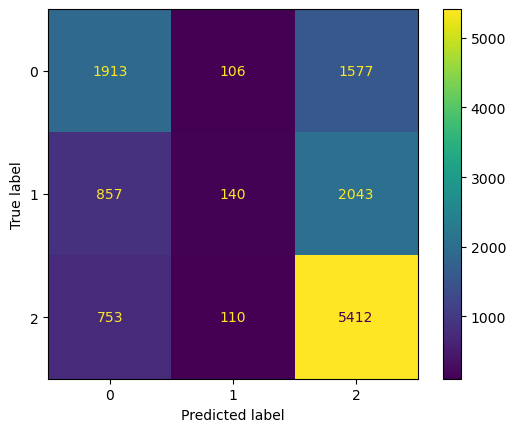

In [122]:
plot_confusion_matrix(reg, X_test, y_test) 

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



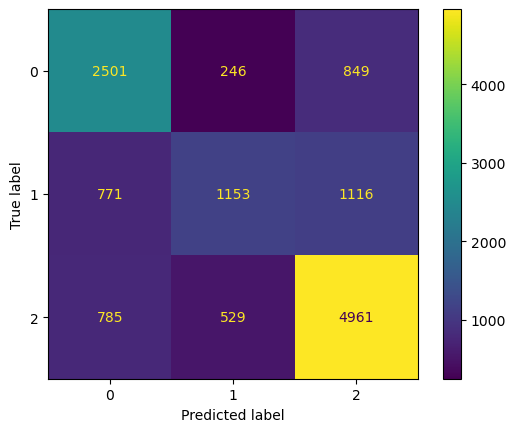

In [123]:
reg = DecisionTreeClassifier().fit(X, Y)
plot_confusion_matrix(reg, X_test, y_test) 

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



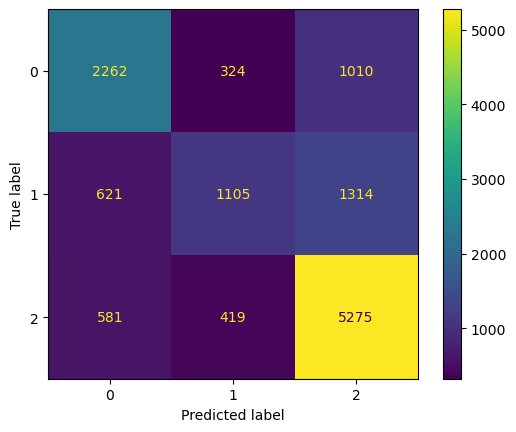

In [124]:
reg = RandomForestClassifier().fit(X, Y)
plot_confusion_matrix(reg, X_test, y_test) 

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



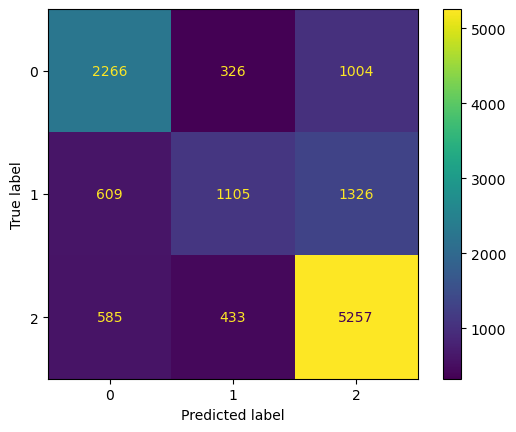

In [125]:
reg = MLPClassifier().fit(X, Y)
plot_confusion_matrix(reg, X_test, y_test) 

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



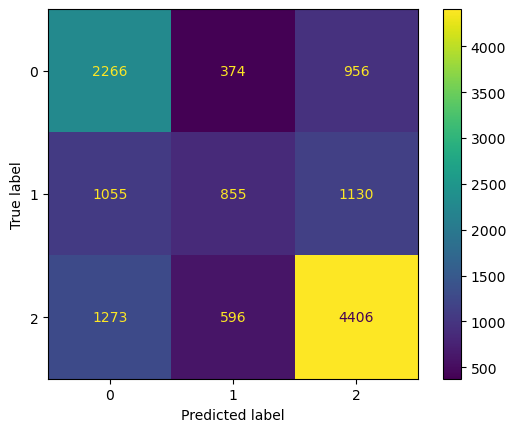

In [126]:
KNN = KNeighborsClassifier().fit(X, Y)
plot_confusion_matrix(KNN, X_test, y_test) 

/Users/costel/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



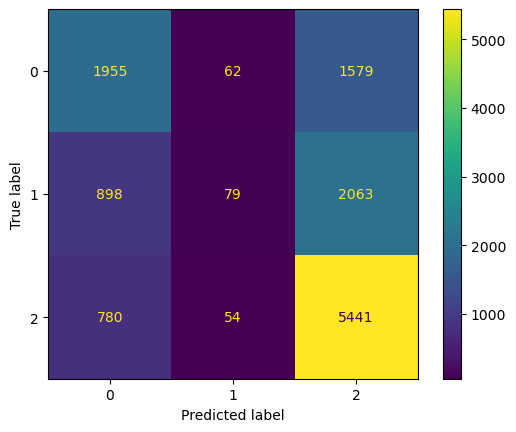

In [127]:
svc = LinearSVC(dual=False).fit(X, Y)
plot_confusion_matrix(svc, X_test, y_test) 